# 1. Importing Libraries

In [1]:
pip -q install --upgrade scikit-learn tqdm matplotlib

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at e:\swe\python3.11.5\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
import zipfile
import shutil
from datetime import date, datetime, timedelta
import datetime as dt

from tqdm import tqdm
tqdm.pandas()

import warnings
warnings.filterwarnings("ignore")

# 2. Data Loading

### Setup Folders

In [26]:
dataset_path = 'data/'
formatted_data_path = 'formatted_data/'

In [27]:
os.makedirs(formatted_data_path, exist_ok=True)

### Load Data

In [42]:
train_data_path = os.path.join(dataset_path, "train.csv")
test_data_path = os.path.join(dataset_path, "test.csv")

df_train = pd.read_csv(train_data_path)
df_test=pd.read_csv(test_data_path)

In [17]:
df_train.head()

,Country Code,Country Name,Indicator,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
0,Afg,Afghanistan,Access to electricity (% of population),4.446890831,9.294527054,14.13361645,18.9711647,23.81418228,28.66967201,33.54441833,38.44000244,42.4,48.27900696,42.7,43.22201891,69.1,68.0408783,89.5,71.5
1,Afg,Afghanistan,Agricultural land (% of land area),57.94581666,57.94734986,57.93968385,58.08380479,58.15126566,58.13440044,58.12366803,58.12980084,58.13286724,58.13286724,58.13440044,58.13133404,58.12980084,58.12366803,58.12366803,58.12366803
2,Afg,Afghanistan,"Annual freshwater withdrawals, total (% of int...",43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668,43.01590668
3,Afg,Afghanistan,Arable land (% of land area),11.77958696,11.77958696,11.77192095,11.91604189,11.98350275,11.96663754,11.94977232,11.94977232,11.94977232,11.94823912,11.94823912,11.94517272,11.94363951,11.93597351,11.91450869,11.90530948
4,Afg,Afghanistan,Forest area (% of land area),1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994,1.852781994


# 3. Statistical Analysis

### Data Information

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Code   3192 non-null   object
 1   Country Name   3192 non-null   object
 2   Indicator      3192 non-null   object
 3   2000 [YR2000]  3192 non-null   object
 4   2001 [YR2001]  3192 non-null   object
 5   2002 [YR2002]  3192 non-null   object
 6   2003 [YR2003]  3192 non-null   object
 7   2004 [YR2004]  3192 non-null   object
 8   2005 [YR2005]  3192 non-null   object
 9   2006 [YR2006]  3192 non-null   object
 10  2007 [YR2007]  3192 non-null   object
 11  2008 [YR2008]  3192 non-null   object
 12  2009 [YR2009]  3192 non-null   object
 13  2010 [YR2010]  3192 non-null   object
 14  2011 [YR2011]  3192 non-null   object
 15  2012 [YR2012]  3192 non-null   object
 16  2013 [YR2013]  3192 non-null   object
 17  2014 [YR2014]  3192 non-null   object
 18  2015 [YR2015]  3192 non-null

In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   2926 non-null   object
 1   Indicator      2926 non-null   object
 2   2016 [YR2016]  2926 non-null   object
 3   2017 [YR2017]  2926 non-null   object
 4   2018 [YR2018]  2926 non-null   object
 5   2019 [YR2019]  2926 non-null   object
 6   2020 [YR2020]  2926 non-null   object
dtypes: object(7)
memory usage: 160.1+ KB


### Data Description

In [20]:
df_train.describe()

,Country Code,Country Name,Indicator,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015]
count,3192,3192,3192,3192,3192,3192,3192,3192,3192,3192,3192,3192,3192,3192,3192,3192,3192,3192,3192
unique,200,266,12,2627,2635,2645,2653,2690,2701,2704,2705,2672,2671,2678,2685,2690,2700,2728,2415
top,Mal,Afghanistan,Access to electricity (% of population),..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
freq,60,12,266,371,367,358,357,323,318,308,304,333,332,330,324,316,315,276,602


In [21]:
df_test.describe()

,Country Name,Indicator,2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020]
count,2926,2926,2926,2926,2926,2926,2926
unique,266,11,1919,1904,1910,1902,1896
top,Afghanistan,Access to electricity (% of population),..,..,..,..,..
freq,11,266,879,879,879,878,881


### Data Shape

In [24]:
df_train.shape

(3192, 19)

In [25]:
df_test.shape

(2926, 7)

# 4. Formatting Data for Analysis

Creating time-series data CSV files for each country

In [64]:
# get unique country names
unique_countries = df_train['Country Name'].unique()

for country in tqdm(unique_countries, desc="Processing countries"):
    # filter dataframe for the current country
    country_df = df_train[df_train['Country Name'] == country]
    
    # clean year column names
    year_columns = country_df.columns[3:]
    renamed_columns = [col.split(' [')[0] for col in year_columns]
    rename_dict = dict(zip(year_columns, renamed_columns))
    country_df.rename(columns=rename_dict, inplace=True)
    
    # rename 'Indicator' column to 'Years' and set it as index
    country_df.rename(columns={'Indicator': 'Year'}, inplace=True)
    country_df.set_index('Year', inplace=True)
    
    # transpose df
    country_df = country_df.drop(columns=['Country Code', 'Country Name']).transpose()
    
    # Convert 'Year' column to datetime
    country_df.index = pd.to_datetime(country_df.index, format='%Y')
    
    # Replace non-numeric values with NaN
    country_df = country_df.replace('..', float('nan'))
    
    # write to csv
    country_df.to_csv(f'{formatted_data_path}{country}.csv', index_label='Year')

Processing countries: 100%|██████████| 266/266 [00:01<00:00, 174.84it/s]


# 5. Exploratory Data Analysis(EDA)

Processing Countries: 100%|██████████| 20/20 [00:00<00:00, 76.84it/s]


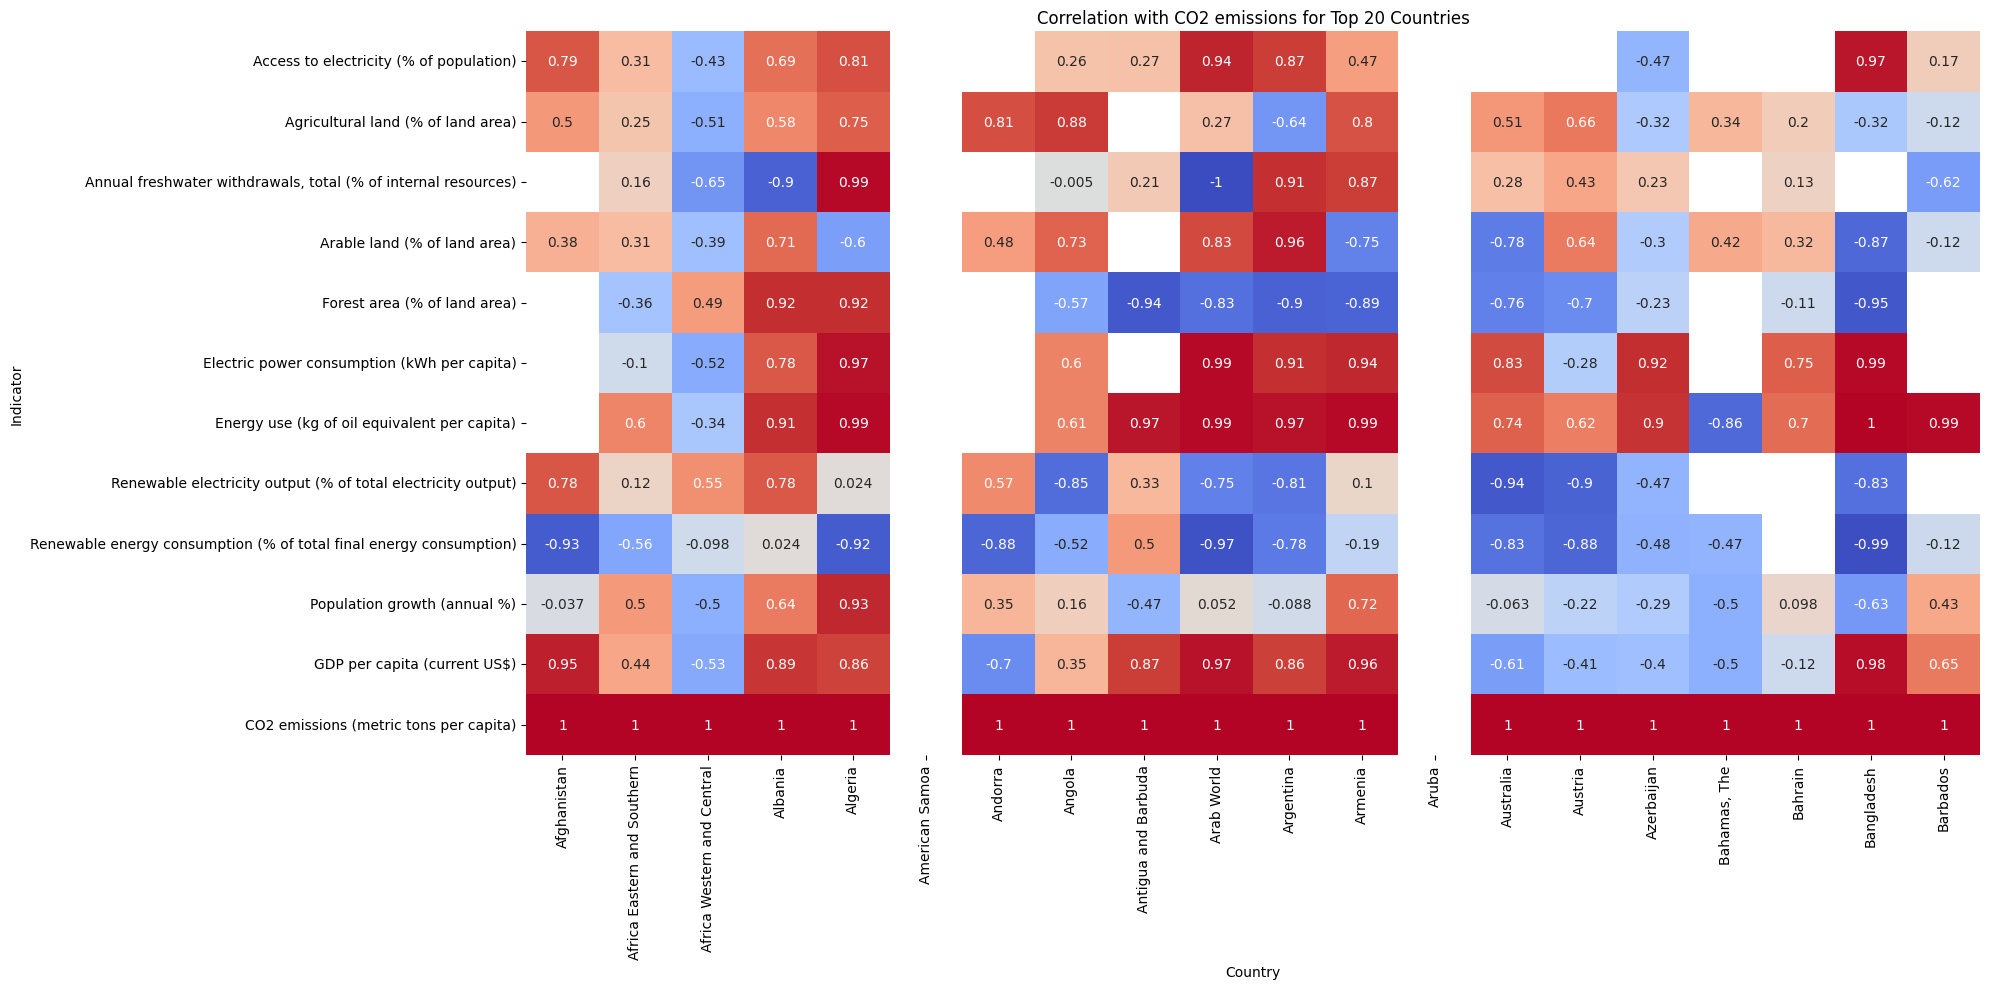

In [76]:
# Get list of CSV files in the directory
country_files = [file for file in os.listdir(formatted_data_path) if file.endswith(".csv")]

# Calculate the number of countries to consider
num_countries = 20

# Load correlation data for all countries
correlation_data = {}
for file in tqdm(country_files[:num_countries], desc="Processing Countries"):
    country_df = pd.read_csv(os.path.join(formatted_data_path, file), index_col='Year', parse_dates=True)
    co2_emissions = country_df['CO2 emissions (metric tons per capita)']
    correlation_matrix = country_df.corrwith(co2_emissions)
    correlation_data[file[:-4]] = correlation_matrix

# Create a dataframe from correlation data
correlation_df = pd.DataFrame(correlation_data)

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', cbar=False)
plt.xlabel('Country')
plt.ylabel('Indicator')
plt.title('Correlation with CO2 emissions for Top 20 Countries')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()